# R processing and plotting of phylo analyses

# TO be combined into other R notebook????

In [1]:
# necessary for me on MedicineBow cluster
 .libPaths(c("/cluster/medbow/home/sharrin2/R/x86_64-pc-linux-gnu-library/4.4",
            "/apps/u/spack/gcc/14.2.0/r/4.4.0-w7xoohc/rlib/R/library"))


# load up some packages
library(ape)
library(phytools)


Loading required package: maps



In [53]:
# Load up the paths we need

iq_file <- "/project/inbreh/radseq_cloud/iqtree_out/ruber.treefile"
coords <- read.csv("/project/inbreh/radseq_cloud/ruber_data/Localities.csv", header=TRUE, row.names=NULL) # path to the geographic coordinates for the samples


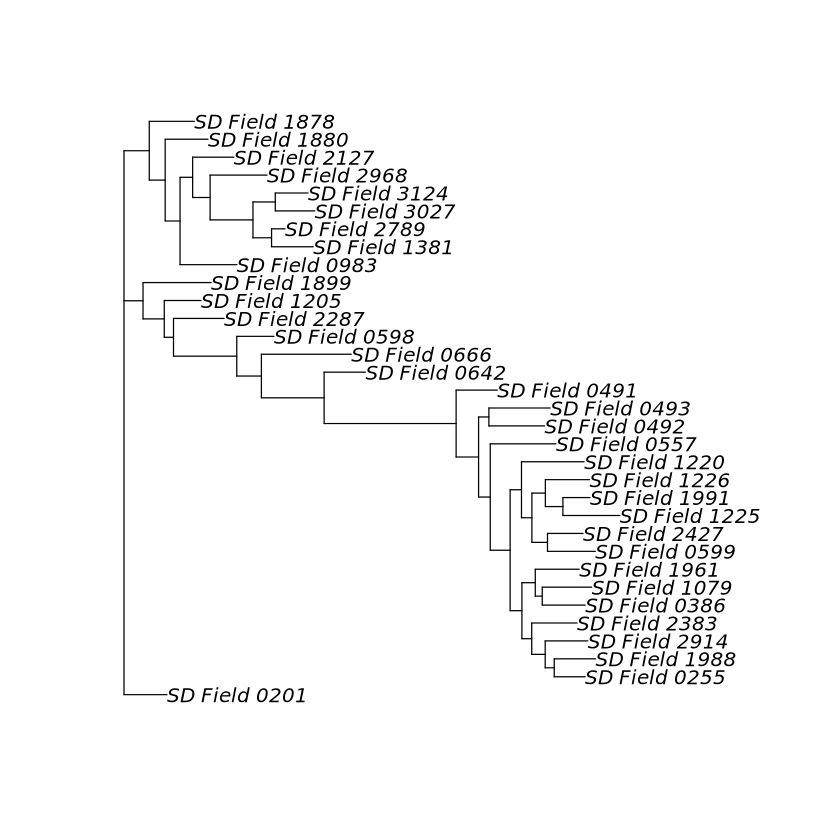

In [3]:
#plot IQTree

iq_tree <- read.tree(iq_file)

# Use functions from ape to plot the tree

plot.phylo(iq_tree) # plot the tree

IQtree generates an unrooted tree, so we need to do some manipulation to put the root where it should be. This will be true of most phylogenetic inference programs if they do not include a clock model.

Usually, we would include outgroup taxa in the tree to know where the root goes. Since we removed all of the outgroups in one of our ipyrad branching steps, we'll root the tree based on the published tree from Harrington et al.

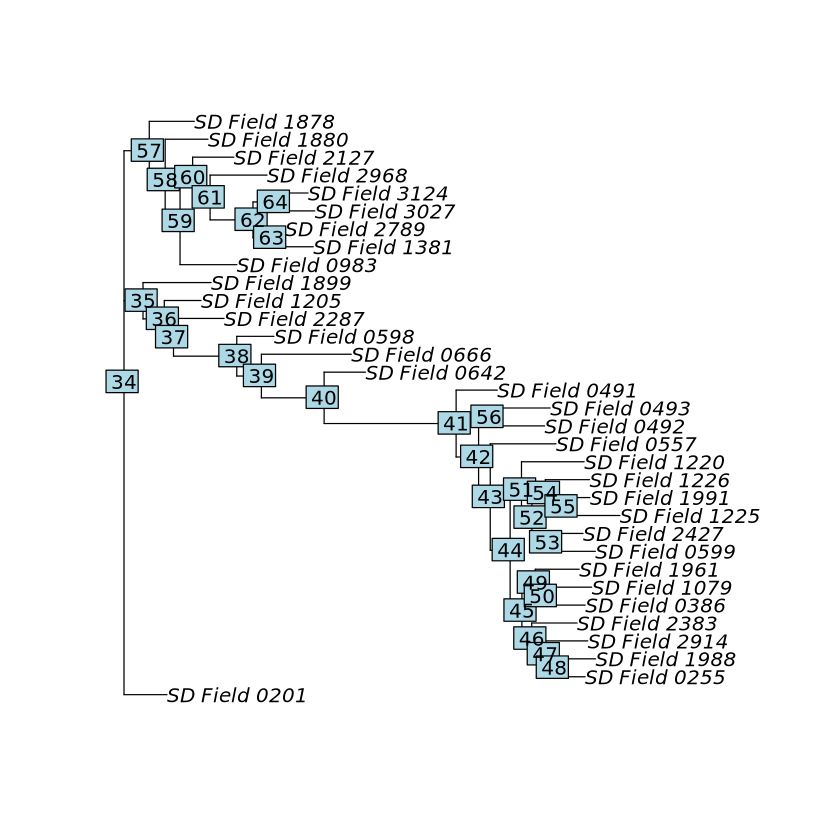

In [6]:
# start by plotting the tree with node labels so that we can the index of the node we want to root on:
plot(iq_tree) # note here that just using plot() will call plot.phylo because the object to be plotted is a phylo object
nodelabels()

[1] "SD_Field_0201" "SD_Field_0255" "SD_Field_1988" "SD_Field_2914"
 [5] "SD_Field_2383" "SD_Field_0386" "SD_Field_1079" "SD_Field_1961"
 [9] "SD_Field_0599" "SD_Field_2427" "SD_Field_1225" "SD_Field_1991"
[13] "SD_Field_1226" "SD_Field_1220" "SD_Field_0557" "SD_Field_0492"
[17] "SD_Field_0493" "SD_Field_0491" "SD_Field_0642" "SD_Field_0666"
[21] "SD_Field_0598" "SD_Field_2287" "SD_Field_1205" "SD_Field_1899"
[25] "SD_Field_0983" "SD_Field_1381" "SD_Field_2789" "SD_Field_3027"
[29] "SD_Field_3124" "SD_Field_2968" "SD_Field_2127" "SD_Field_1880"
[33] "SD_Field_1878"

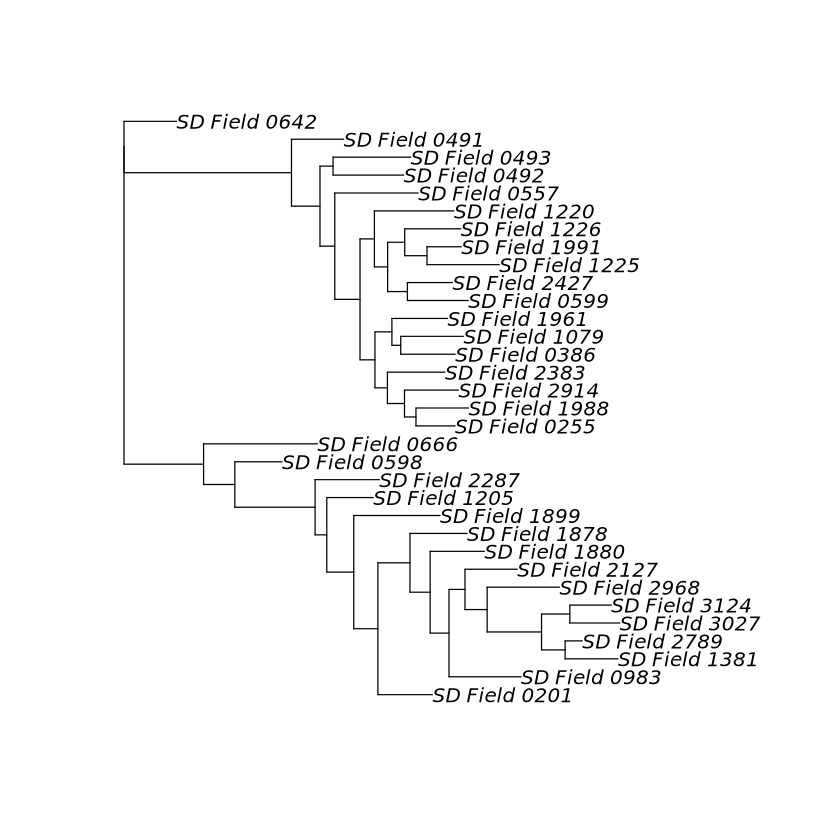

In [11]:
# Specify the numeric node index to root on
node_to_root <- 40  # Replace with the correct node number if yours is different

# Root the tree
rooted_tree <- root(iq_tree, node = node_to_root, resolve.root = TRUE)

# Plot the rooted tree
plot(rooted_tree)

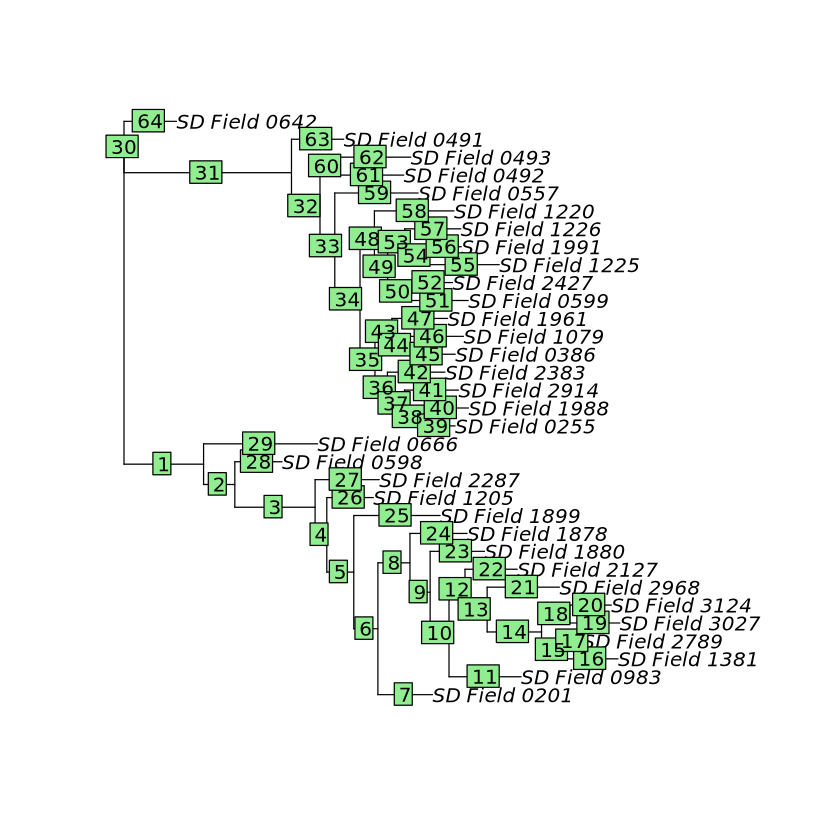

In [18]:
# MRCA way - this is probably better

# Specify the taxa for the "outgroup"
taxa <- c("SD_Field_0642", "SD_Field_0255")

# Get the MRCA node
mrca_node <- getMRCA(iq_tree, taxa)

# Root the tree at the MRCA node
rooted_tree <- root(iq_tree, node = mrca_node, resolve.root = TRUE)

# Plot the rooted tree
plot(rooted_tree)
edgelabels()

For me, the branch that unites SD Field 0642 with the rest of its clade is 30, and the node that defines the other clade at the root is 1. If your branches are different, you'll need to adjust these.

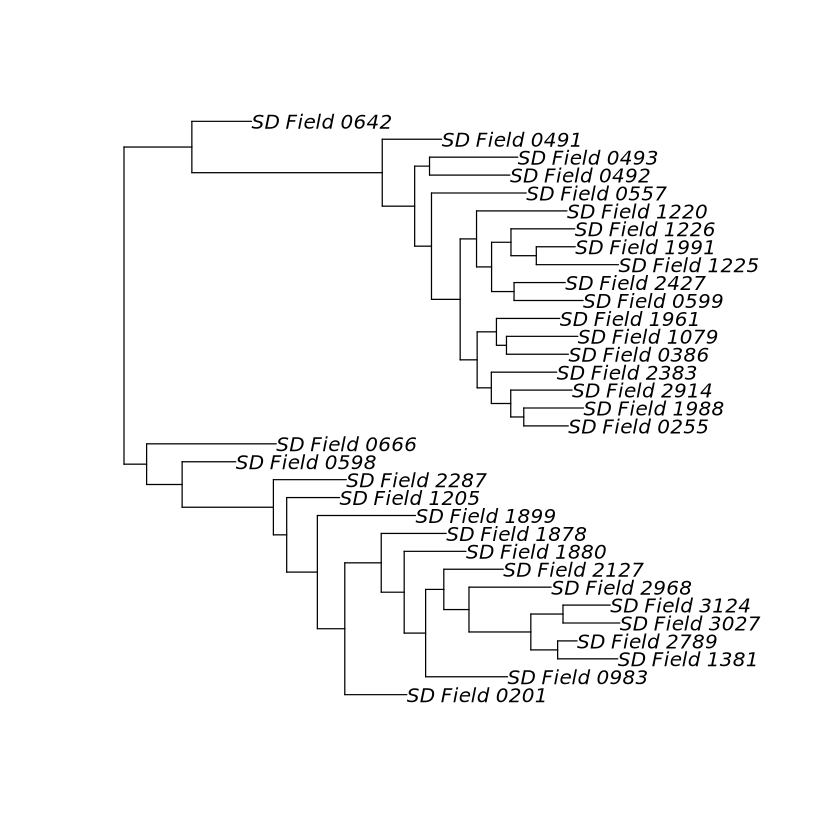

In [23]:
# take half of the length of edge 1 and assign it to the length of edge 30, which is zero right now


# Get the current length of edge 1
edge_1_length <- rooted_tree$edge.length[1]

# Halve the length of edge 1
new_edge_1_length <- edge_1_length / 2

# Get the current length of edge 30
edge_30_length <- rooted_tree$edge.length[30]

# Assign the new halved length to edge 1
rooted_tree$edge.length[1] <- new_edge_1_length

# Add the remaining length to edge 30
rooted_tree$edge.length[30] <- edge_30_length + (edge_1_length - new_edge_1_length)


plot(rooted_tree)


Cool, that looks much better and doesn't make it look like we have a polytomy at the root of the tree.

Next, we can add the support values to the nodes of the tree (bootstraps and shALRT)

## more details here, check on what the aLRT values are called

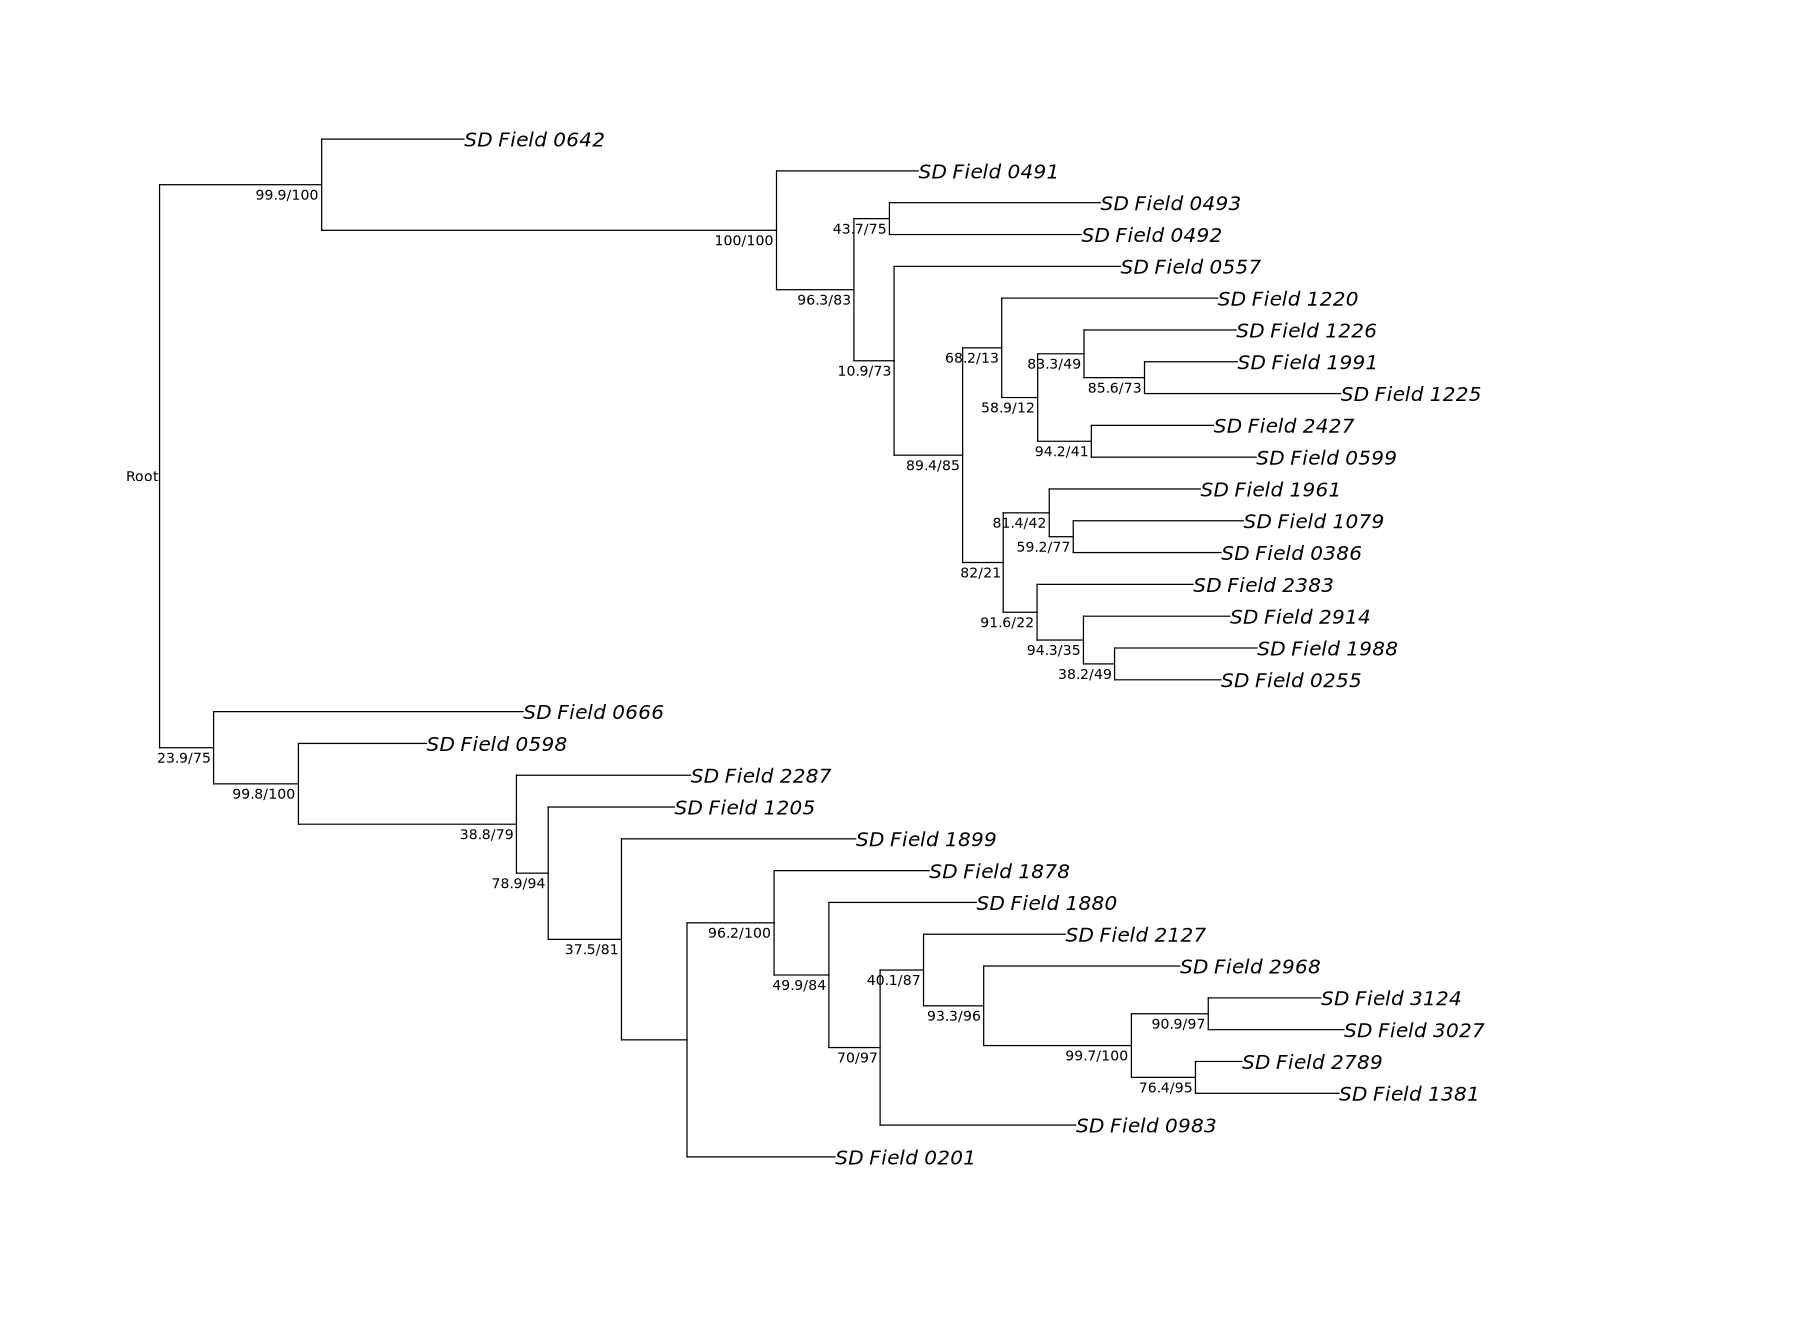

In [50]:
# Increase plot size for Jupyter
options(repr.plot.width = 15, repr.plot.height = 11)

plot(rooted_tree)
nodelabels(text = rooted_tree$node.label, adj = c(1.05, 1.5), cex = 0.7, frame = "none")

This should allow us to see the support values nicely. Note that the root just has "Root" at it, because it contains all the taxa and there is nothing to assess support for.


# do some simple plotting/manipulation for the SVDQ tree, but then say we can do the same for it, and then just plot the iqTree to map


In [56]:
# Get the coordinates for just the individuals we want to plot and put in the same order as the tip labels
ind_names <- rooted_tree$tip.label

ind_names[which(!ind_names %in% coords[,"Field.No."])] # check if there are any individuals not in the coordinates
# match up the coordinates to the order of the individuals from snmf
match_coords<-match(ind_names, coords[,"Field.No."])
snmf_coords<-coords[match_coords,]

[1] "SD_Field_0201" "SD_Field_0255" "SD_Field_1988" "SD_Field_2914"
 [5] "SD_Field_2383" "SD_Field_0386" "SD_Field_1079" "SD_Field_1961"
 [9] "SD_Field_0599" "SD_Field_2427" "SD_Field_1225" "SD_Field_1991"
[13] "SD_Field_1226" "SD_Field_1220" "SD_Field_0557" "SD_Field_0492"
[17] "SD_Field_0493" "SD_Field_0491" "SD_Field_0642" "SD_Field_0666"
[21] "SD_Field_0598" "SD_Field_2287" "SD_Field_1205" "SD_Field_1899"
[25] "SD_Field_0983" "SD_Field_1381" "SD_Field_2789" "SD_Field_3027"
[29] "SD_Field_3124" "SD_Field_2968" "SD_Field_2127" "SD_Field_1880"
[33] "SD_Field_1878"

ERROR: Error in eval(expr, envir, enclos): object 'ind_names' not found


In [55]:
phylo.to.map(rooted_tree, coords)


ERROR: Error in aggregate.data.frame(as.data.frame(x), ...): arguments must have same length
